# Week 3 Discussion: Gradient Descent

## Objectives

Stochastic gradient descent stands out as an optimization algorithm frequently employed in machine learning scenarios to determine the model parameters. Gradient descent is used widely, and coupled with backpropagation, is at the heart of training many machine learning models.

In this week's tutorial, we will delve into the workings of gradient descent and stochastic gradient descent algorithms. The focus will be on their application to minimize the loss function in machine learning. Additionally, we'll explore the significance of the learning rate, its impact on results, and delve into the process of crafting a personalized function for stochastic gradient descent.

## Sources

This discussion on gradient descent is based on the following references:
<br>
[Stochastic Gradient Descent Algorithm With Python and NumPy](https://realpython.com/gradient-descent-algorithm-python/)

### Basic Gradient Descent Algorithm

The gradient descent algorithm stands as an iterative and approximate approach to mathematical optimization, suitable for navigating towards the minimum of any differentiable function. While it is not guaranteed to always find the global minimum, it remains a prevalent choice in practical applications. 

In the realms of data science and machine learning, it finds frequent application, particularly in the internal optimization of model parameters. A notable instance is the utilization of gradient descent in neural networks to determine optimal weights and biases. We will learn about neural networks later in the course.

#### Cost Function: The Goal of Optimization

The cost function, also known as the loss function, is the function that needs to be minimized (or maximized) by adjusting the decision variables.

For example, in a regression scenario, we typically work with input variable vectors $x = [x_1, x_2, ..., x_p]^T$ and actual outputs $y$. The objective is to discover a model that links $x$ to a predicted response $f(x)$, aiming for 𝑓(𝐱) to closely match 𝑦. For instance, predicting a person's salary based on factors like their years at the company or education level.

The goal is to minimize the difference, known as the residual, between the prediction $f(x)$ and the actual data $y$. In this type of problem, the focus is on minimizing the residual sum of squares ($RSS$), where $RSS = \sum_i (y_i - f(x_i))^2$ for all observations $i \in \{1, 2, ..., n\}$ with $n$ being the total number of observations. Alternatively, mean squared error ($MSE = RSS / n$) can be used instead of $RSS$.

Both $RSS$ and $MSE$ involve squaring the difference between actual and predicted outputs. The objective is to minimize this difference through the adjustment of model parameters. For instance, in linear regression, where $f(x) = b_0 + b_1 x_1 + ... + b_p x_p$, the aim is to determine weights $b_0, b_1, ..., b_p$ that minimize $RSS$ or $MSE$, indicating a more accurate prediction with lower differences, and zero difference denotes an equal prediction to the actual data.

#### Intuition Behind Gradient Descent

Think of the gradient descent algorithm like a drop of water rolling down the side of a bowl or a ball descending a hill. Both the drop and the ball naturally gravitate towards the steepest decrease until they settle at the lowest point, gaining momentum as they go.

In the context of gradient descent, you initially place a point and systematically shift it towards the direction of the quickest decrease in the cost function. This direction aligns with the negative gradient vector, denoted as $-\nabla C$.

Starting from a random position you update or move it iteratively in the direction of the negative gradient: $v = v - \eta \nabla C$, where $\eta$ (pronounced "ee-tah") stands for the learning rate—a crucial parameter. The learning rate influences the size of the update or movement. If $\eta$ is too small, the algorithm may converge slowly, while large $\eta$ values can lead to convergence issues or even cause the algorithm to diverge.

#### Implementation of Basic Gradient Descent

Now that you grasp the fundamentals of gradient descent, let's put it into action using `Python`. In this implementation, we'll stick to plain `Python` and leverage `NumPy` for streamlined array (or vector) operations, ensuring concise code and enhanced performance.

The basic implementation starts with an arbitrary point, denoted as `start`, systematically shifts it towards the minimum through iterative steps, and eventually returns a point, ideally positioned at or close to the minimum:

In [2]:
def gradient_descent(gradient, start, lr, n_iter):
    vector = start
    for _ in range(n_iter):
        diff = -lr * gradient(vector)
        vector += diff
    return vector

The `gradient_descent()` function is designed to take four arguments:

* `gradient`: This parameter represents the function or any Python callable object that accepts a vector and provides the gradient of the function you aim to minimize.

* `start`: Indicating the starting point for the algorithm's search, it is presented as a sequence (tuple, list, `NumPy` array, etc.) or scalar (for one-dimensional problems).

* `lr`: The learning rate governs the magnitude of the vector update during each iteration.

* `n_iter`: This parameter signifies the number of iterations, determining how many times the algorithm will update the position of the point in its search for the minimum.

Also, we can add another termination criterion:

In [3]:
import numpy as np

def gradient_descent(
    gradient, start, lr, n_iter=50, tolerance=1e-06
):
    vectors = [start]
    for _ in range(n_iter):
        diff = -lr * gradient(vectors[-1])
        if np.all(np.abs(diff) <= tolerance):
            break
        new_vector = vectors[-1] + diff
        vectors.append(new_vector)
    return vectors

The `gradient_descent()` function has been enhanced with an additional parameter, tolerance (line 4), setting the minimum allowed movement per iteration. Default values for tolerance and n_iter have been predefined, eliminating the need for explicit specification in each function call.

Lines 9 and 10 introduce a mechanism for the function to cease iterating and return the result prematurely if the vector update in the ongoing iteration is less than or equal to the specified tolerance. This condition accounts for situations near the minimum where gradients are typically small. Although it can also trigger near local minima or saddle points, it improves the function's practicality.

Utilizing `NumPy` functions like `numpy.all()` and `numpy.abs()` on line 9 streamlines the comparison of absolute values, making the code concise and readable.
Also, to see all values, we keep the vector values in a list, so we can plot them.

With the updated `gradient_descent()` function, testing begins with a simple example—finding the minimum of the function $C = v^2$.

Now we can get the list of vectors as they get updated over different iterations:

In [4]:
vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=0.2)

Using the lambda function `lambda v: 2 * v`, we establish the gradient for $v^2$. Initiating the process from the initial value of $10.0$ and configuring a learning rate of $0.2$, we observe the algorithm's performance in finding the minimum for this specific function.

To see how this algorithm works, we can write a plotting function:

In [5]:
import matplotlib.pyplot as plt
def plot(cost_function, vectors):
    assert vectors and isinstance(vectors[0], float) # makes sure out vectors are one dimensional. This function does not support more than one dimensional vectors
    vectors = np.array(vectors)
    fig, ax  = plt.subplots()
    abs_xlim = abs(vectors).max() + 1
    ax.set_xlim(-abs_xlim, abs_xlim)
    true_func_x = np.linspace(-abs_xlim, abs_xlim, 1000)
    ax.plot(true_func_x, cost_function(true_func_x), color='k')
    ax.scatter(vectors, cost_function(vectors), color = 'r')
    ax.plot(vectors, cost_function(vectors), color = 'r')
    plt.show()

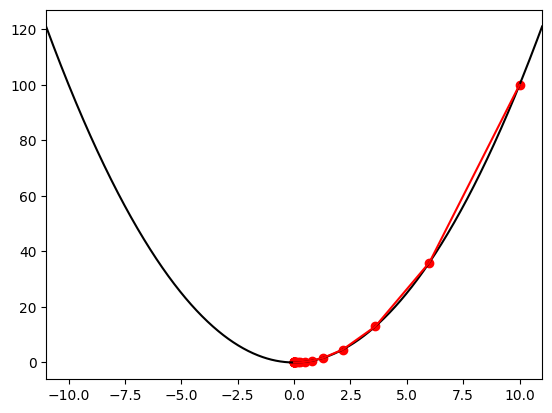

In [6]:
plot(cost_function = lambda v: v**2, vectors=vectors)

Initiating from the rightmost red dot at $v=10$, the algorithm progresses towards the minimum at $v=0$. In the initial stages, updates are more substantial, owing to the higher value of the gradient (and slope). However, as we approach the minimum, these updates gradually diminish. This behavior is a characteristic of the gradient descent algorithm, where the magnitude of adjustments decreases in proximity to the minimum.

#### Impact of Learning Rate

The learning rate holds immense significance in the algorithm, exerting a profound impact on the behavior of gradient descent. In revisiting the earlier example, the learning rate has been adjusted to 0.8 from the previous value of 0.2:

In [7]:
vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=0.8)

With the updated learning rate of 0.8, the algorithm converges to yet another solution that closely approaches zero. However, it's crucial to recognize that the internal dynamics of the algorithm exhibit variation. Here's an overview of how the value of 𝑣 evolves over the iterations:

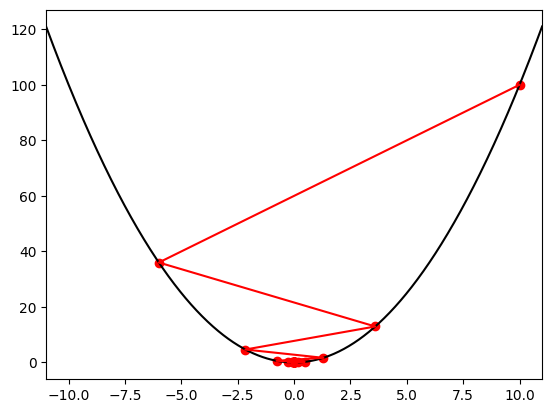

In [8]:
plot(cost_function = lambda v: v**2, vectors=vectors)

If the learning rate is too large, it could happen that the algorithm does not converge at all:

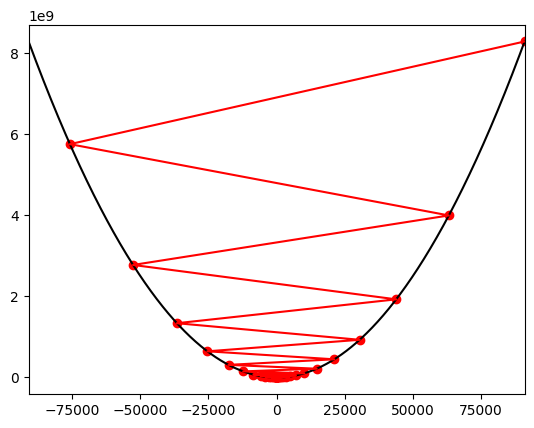

In [9]:
vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=1.1)
plot(cost_function = lambda v: v**2, vectors=vectors)

Note that we started at value $v = 10$ and we got to valus even larger than 75000! In this case, gradient descent will not converge at all.

On the other hand, using small learning rates may lead to a sluggish convergence. If the iterations are constrained, the algorithm might terminate before reaching the minimum. Alternatively, allowing it to continue might result in an impractically lengthy process. To exemplify this, let's execute `gradient_descent()` once more, this time employing a significantly reduced learning rate of 0.005:

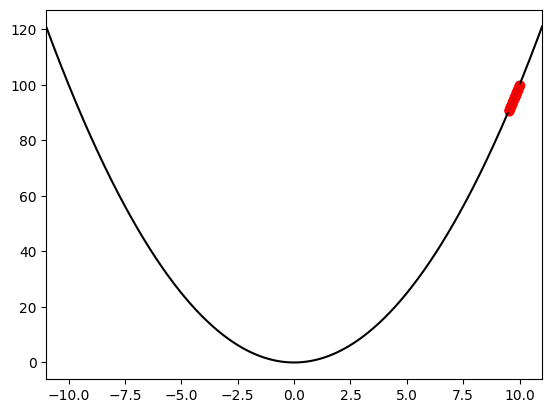

In [10]:
vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=0.0005)
plot(cost_function = lambda v: v**2, vectors=vectors)

It's important to observe that the search process initiates from $𝑣 = 10$, similar to the previous instances. However, within fifty iterations, it doesn't manage to reach zero. Yet, extending the iterations to a hundred yields a smaller error, and with a thousand iterations, you'll find yourself in close proximity to zero:

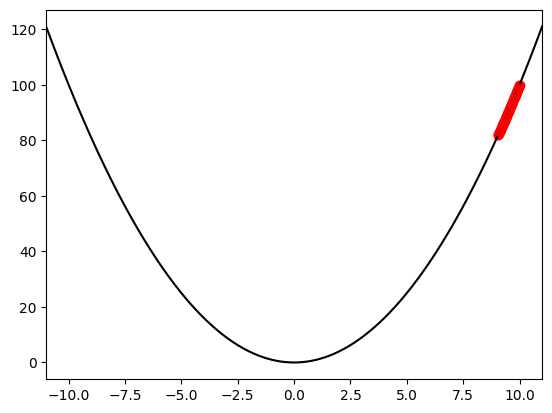

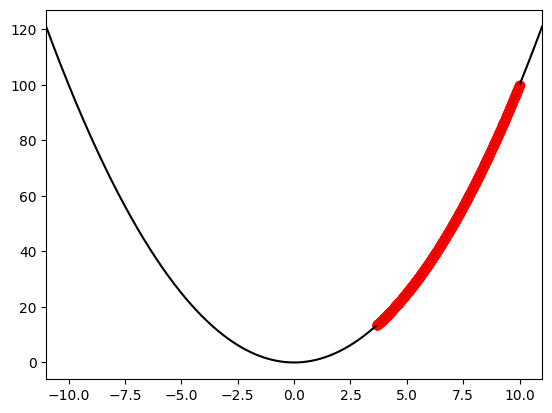

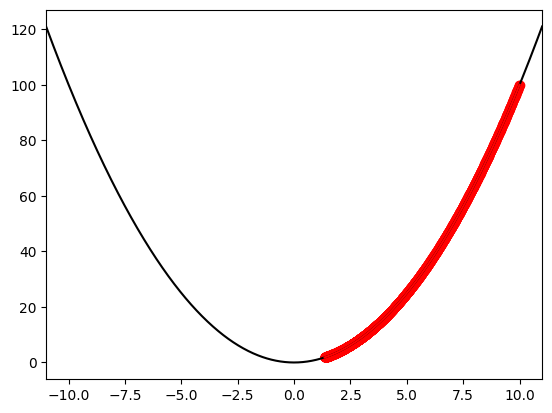

In [11]:
vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=0.0005, n_iter=100)
plot(cost_function = lambda v: v**2, vectors=vectors)

vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=0.0005, n_iter=1000)
plot(cost_function = lambda v: v**2, vectors=vectors)

vectors = gradient_descent(gradient=lambda v: 2 * v, start=10.0, lr=0.0005, n_iter=2000)
plot(cost_function = lambda v: v**2, vectors=vectors)

It's noteworthy that there is a group of functions called nonconvex functions which introduce the possibility of local minima, potentially trapping the gradient descent. In these cases, the critical factors influencing success are the thoughtful selection of the learning rate and the initial starting point. These choices can be the deciding factors between converging to a local minimum or successfully navigating to the global minimum in the optimization process.

Let's explore the function $v^4-5v^2-3v$, which possesses a global minimum around $v \approx 1.7$ and a local minimum at $v \approx 1.42$. The gradient of this function is expressed as $4v^3-10v-3$. Now, let's observe how the `gradient_descent()` function operates in this context:

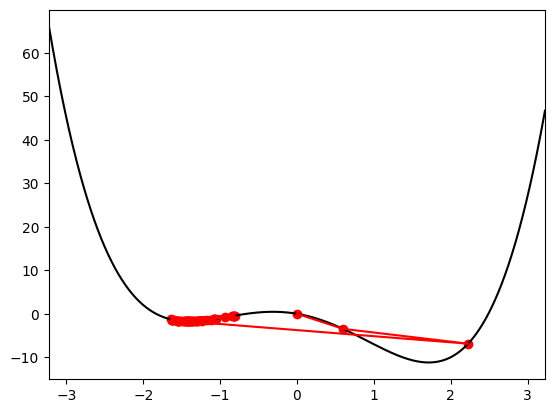

In [12]:
vectors = gradient_descent(gradient=lambda v: 4 * (v**3) - 10 * v - 3, start=0.0, lr=0.2)
plot(cost_function = lambda v: (v ** 4) - 5 * (v ** 2) - 3 * v, vectors=vectors)

The initial stages of the algorithm exhibit movement towards the global minimum, only to encounter a shift to the opposite side, ultimately becoming ensnared in the local minimum. This dynamic behavior underscores the influence of the initial starting point in navigating the complex landscape of nonconvex functions.

We can prevent this by using another starting point and learning rate:

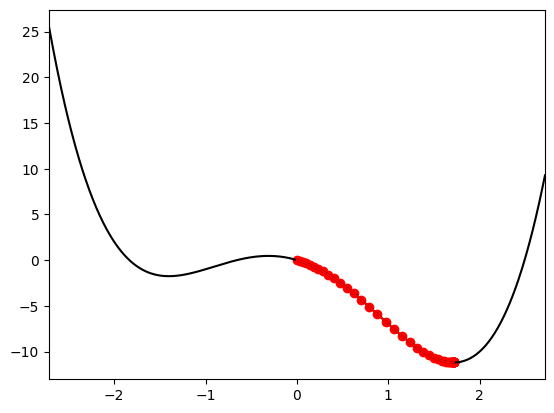

In [24]:
vectors = gradient_descent(gradient=lambda v: 4 * (v**3) - 10 * v - 3, start=0.0, lr=0.01)
plot(cost_function = lambda v: (v ** 4) - 5 * (v ** 2) - 3 * v, vectors=vectors)

 Lowering the learning rate serves to restrain the vector from making substantial leaps, ensuring it stays in closer proximity to the global optimum. This nuanced adjustment highlights the delicate balance required in setting the learning rate.

Determining the optimal learning rate in advance is indeed challenging, and various techniques and heuristics aim to aid in this process. Machine learning practitioners often engage in the tuning of learning rates during model selection and evaluation to achieve optimal performance.

Additionally, the starting point's impact on the solution becomes particularly pronounced with nonconvex functions. The initial choice of where to commence the search can significantly influence the algorithm's ability to navigate the intricate landscape and converge to the desired minimum.

## What We Have Learned

In this discussion, we learned:
* What gradient descent is
* How to implement a simple gradient descent
* How the choice of parameters affects the behavior of gradient descent, and the answers it finds

Hope you have enjoyed this lesson!